# Introduction to Decision Trees (CART)


Decision Trees are an important type of algorithm for predictive modeling machine learning.
The classical decision tree algorithms have been around for decades and modern variations
like random forest are among the most powerful techniques available.Decision tree algorithm also known by it’s more modern name CART which
stands for Classification And Regression Trees.


Classification and Regression Trees or CART for short is a term introduced by Leo Breiman
to refer to Decision Tree algorithms that can be used for classification or regression predictive
modeling problems. Classically, this algorithm is referred to as decision trees, but on some
platforms like R they are referred to by the more modern term CART. The CART algorithm
provides a foundation for important algorithms like bagged decision trees, random forest and
boosted decision trees.


The representation for the CART model is a binary tree. This is your binary tree from algorithms
and data structures, nothing too fancy. Each node represents a single input variable (x) and
a split point on that variable (assuming the variable is numeric). The leaf nodes of the tree contain an output variable (y) which is used to make a prediction. Given a dataset with two
inputs of height in centimeters and weight in kilograms the output of sex as male or female,
below is a crude example of a binary decision tree (completely fictitious for demonstration
purposes only).


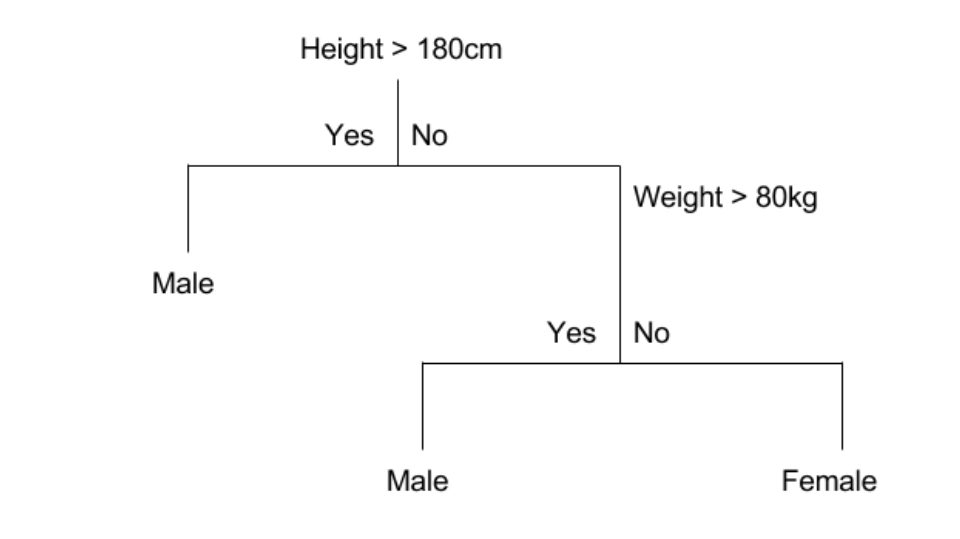

The tree can be stored to file as a graph or a set of rules.

If Height > 180 cm Then Male

If Height <= 180 cm AND Weight > 80 kg Then Male

If Height <= 180 cm AND Weight <= 80 kg Then Female


With the binary tree representation of the CART model described above, making predictions is
relatively straightforward. Given a new input, the tree is traversed by evaluating the specific
input started at the root node of the tree. A learned binary tree is actually a partitioning of the
input space. You can think of each input variable as a dimension on an p-dimensional space.
The decision tree split this up into rectangles (when p = 2 input variables) or hyper-rectangles
with more inputs. New data is filtered through the tree and lands in one of the rectangles and the output value for that rectangle is the prediction made by the model. This gives you some
feeling for the type of decisions that a CART model is capable of making, e.g. boxy decision
boundaries. For example, given the input of height = 160 cm and weight = 65 kg, we would
traverse the above tree as follows:
1. Height > 180 cm: No
2. Weight > 80 kg: No
3. Therefore: Female

Creating a binary decision tree is actually a process of dividing up the input space. A greedy
approach is used to divide the space called recursive binary splitting. This is a numerical
procedure where all the values are lined up and different split points are tried and tested using
a cost function. The split with the best cost (lowest cost because we minimize cost) is selected.
All input variables and all possible split points are evaluated and chosen in a greedy manner
(e.g. the very best split point is chosen each time). For regression predictive modeling problems
the cost function that is minimized to choose spit points is the sum squared error across all
training samples that fall within the rectangle

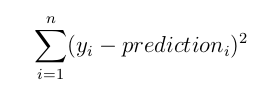

Where y is the output for the training sample and prediction is the predicted output for the
rectangle. For classification the Gini cost function is used which provides an indication of how
pure the leaf nodes are (how mixed the training data assigned to each node is).

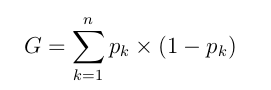

Where G is the Gini cost over all classes, p k are the number of training instances with class
k in the rectangle of interest. A node that has all classes of the same type (perfect class purity)
will have G = 0, where as a G that has a 50-50 split of classes for a binary classification problem
(worst purity) will have a G = 0.5.


The recursive binary splitting procedure described above needs to know when to stop splitting
as it works its way down the tree with the training data. The most common stopping procedure
is to use a minimum count on the number of training instances assigned to each leaf node. If
the count is less than some minimum then the split is not accepted and the node is taken as a
final leaf node. The count of training members is tuned to the dataset, e.g. 5 or 10. It defines
how specific to the training data the tree will be. Too specific (e.g. a count of 1) and the tree
will overfit the training data and likely have poor performance on the test set.

In [1]:
#demostration

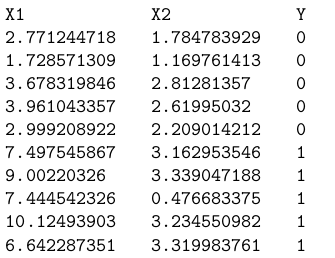


The CART model is learned by looking for split points in the data. A split point is a single
value of a single attribute, e.g. the first value of the X1 attribute 2.771244718. Partitioning
data at a split point involves separating all data at that node into two groups, left of the split
point and right of the split point. If we are working on the first split point in the tree, then all
of the dataset is affected. If we are working on say a split point one level deep, then only the
data that has filtered down the tree from nodes above and is sitting at that node is affected by
the split point.

We are not concerned with what the class value is of the chosen split point. We only care
about the composition of the data assigned to the LEFT and to the RIGHT child nodes of the
split point. A cost function is used to evaluate the mix of classes of training data assigned to
each side of the split. In classification problems the Gini index cost function is used.

We calculate the Gini index for a split point as follows:

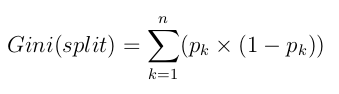


For each class (k), for each group (left and right). Where p is the proportion of training
instances with a given class in a given group. We will always have two groups, a left and right
group because we are using a binary tree. And we know from our dataset that we only have
two classes. Therefore we can calculate the Gini index of any split point in our dataset as the
sum of:

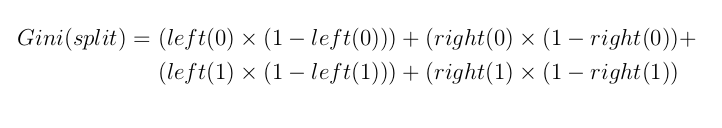

Where left(0) is the proportion of data instances in the left group with class 0, right(0) is
the proportion of data instances in the right group with class 0, and so on.The proportion
of data instances of a class is easy to calculate. If a LEFT group has 3 instances with class 0
and 4 instances with class 1, then the proportion of data instances with class 0 would be 3/7 or
0.428571429.

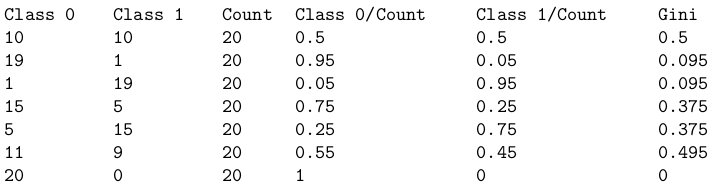


It is easy to visualize these scenarios for one group, but the concepts translate to summing
the proportions across the LEFT and RIGHT groups. You can see when the group has a 50-50
mix in the first row, that Gini is 0.5. This is the worst possible split. You can also see a case
where the group only has data instances with class 0 on the last row and a Gini index of 0. This
is an example of a perfect split. Our goal in selecting a split point is to evaluate the Gini index
of all possible split points and greedily select the split point with the lowest cost.

The first step is to choose a split that will become the stump or root node of our decision tree.
We will start with the first candidate split point which is the X1 attribute and the value of X1
in the first instance: X1 = 2.771244718.

* IF X1 < 2.771244718 THEN LEFT
* IF X1 ≥ 2.771244718 THEN RIGHT

Let’s apply this rule to each X1 value in our training dataset.

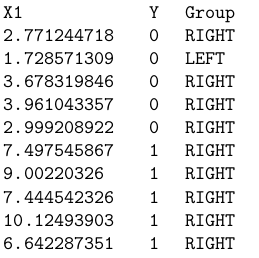

How good was this split? We can evaluate the mixture of the classes in each of the LEFT
and RIGHT nodes as a single cost of choosing this split point for our root node. The LEFT
group only has one member, where as the RIGHT group has 9 members. Starting with the
LEFT group, we can calculate the proportion of training instances that have each class:

* Y = 0: 1/1 or 1.0
* Y = 1: 0/1 or 0.0

The RIGHT group is more interesting as it is comprised of a mix of classes (we are probably
going to get a high Gini index).

* Y = 0: 4/9 or 0.444444444
* Y = 1: 5/9 or 0.555555556

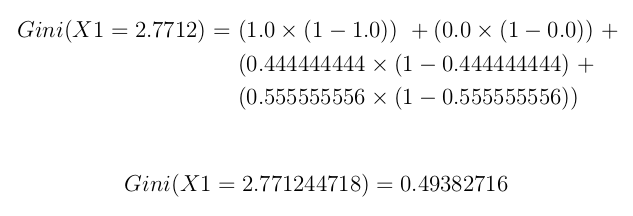

We can evaluate each candidate split point using the process above with the values from X1
and X2. A close fit would be the value for X1 in the last instance: X1 = 6.642287351.

* IF X1 < 6.642287351 THEN LEFT
* IF X1 ≥ 6.642287351 THEN RIGHT

By following same procedure, we get Gini(X1 = 6.642287351) = 0.0

This is a split that results in a pure Gini index because the classes are perfectly separated.
The LEFT child node will classify instances as class 0 and the right as class 1. We can stop
there.


We can now use this decision tree to make some predictions for all of the training instances.
But we have already done that when we calculated the Gini index above. Instead, let’s classify
some new data generated for each class using the same distribution.

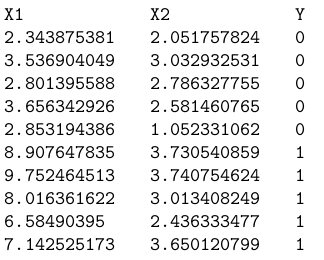

Using the decision tree with a single split at, X1 = 6.642287351 we can classify the test
instances as follows:

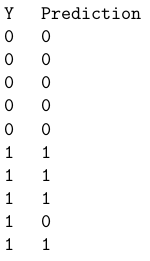

This is a perfect classification or 100% accurate.

In [2]:
#Decision tree from scratch

In [3]:
# CART on the Bank Note dataset
from random import seed
from random import randrange
from csv import reader

In [4]:
# Load a CSV file
def load_csv(filename):
    file = open(filename, "rt")
    lines = reader(file)
    dataset = list(lines)
    return dataset

In [5]:
# Convert string column to float
def str_column_to_float(dataset, column):
    for row in dataset:
        row[column] = float(row[column].strip())

In [6]:
# Test CART on Bank Note dataset
seed(1)
# load and prepare data
filename = 'data_banknote_authentication.csv'
dataset = load_csv(filename)
# convert string attributes to integers
for i in range(len(dataset[0])):
    str_column_to_float(dataset, i)
# print(dataset)

In [7]:
# Split a dataset into k folds
def cross_validation_split(dataset, n_folds):
    dataset_split = list()
    dataset_copy = list(dataset)
    fold_size = int(len(dataset) / n_folds)
    for i in range(n_folds):
        fold = list()
        while len(fold) < fold_size:
            index = randrange(len(dataset_copy))
            fold.append(dataset_copy.pop(index))
        dataset_split.append(fold)
    return dataset_split

In [8]:
# Calculate accuracy percentage
def accuracy_metric(actual, predicted):
    correct = 0
    for i in range(len(actual)):
        if actual[i] == predicted[i]:
            correct += 1
    return correct / float(len(actual)) * 100.0


In [9]:
# Split a dataset based on an attribute and an attribute value
def test_split(index, value, dataset):
    left, right = list(), list()
    for row in dataset:
        if row[index] < value:
            left.append(row)
        else:
            right.append(row)
    return left, right

In [10]:
# Calculate the Gini index for a split dataset
def gini_index(groups, classes):
    # count all samples at split point
    n_instances = float(sum([len(group) for group in groups]))
    # sum weighted Gini index for each group
    gini = 0.0
    for group in groups:
        size = float(len(group))
        # avoid divide by zero
        if size == 0:
            continue
        score = 0.0
        # score the group based on the score for each class
        for class_val in classes:
            p = [row[-1] for row in group].count(class_val) / size
            score += p * p
        # weight the group score by its relative size
        gini += (1.0 - score) * (size / n_instances)
    return gini

In [11]:
# Select the best split point for a dataset
def get_split(dataset):
    class_values = list(set(row[-1] for row in dataset))
    b_index, b_value, b_score, b_groups = 999, 999, 999, None
    for index in range(len(dataset[0])-1):
        for row in dataset:
            groups = test_split(index, row[index], dataset)
            gini = gini_index(groups, class_values)
            if gini < b_score:
                b_index, b_value, b_score, b_groups = index, row[index], gini, groups
    return {'index':b_index, 'value':b_value, 'groups':b_groups}

In [12]:
node = get_split(dataset)

In [13]:
# Create a terminal node value
def to_terminal(group):
    outcomes = [row[-1] for row in group]
    return max(set(outcomes), key=outcomes.count)


In [14]:
# outcomes = [row[-1] for row in left + right]
# max(set(outcomes), key=outcomes.count)

In [15]:
# l = [i for i in outcomes if i ==1]
# len(l)

In [16]:
# Create child splits for a node or make terminal
def split(node, max_depth, min_size, depth):
    left, right = node['groups']
    del(node['groups'])
    # check for a no split
    if not left or not right:
        node['left'] = node['right'] = to_terminal(left + right)
        return
    # check for max depth
    if depth >= max_depth:
        node['left'], node['right'] = to_terminal(left), to_terminal(right)
        return
    # process left child
    if len(left) <= min_size:
        node['left'] = to_terminal(left)
    else:
        node['left'] = get_split(left)
        split(node['left'], max_depth, min_size, depth+1)
    # process right child
    if len(right) <= min_size:
        node['right'] = to_terminal(right)
    else:
        node['right'] = get_split(right)
        split(node['right'], max_depth, min_size, depth+1)


In [17]:
left, right = node['groups']
# del(node['groups'])
len(right)

715

In [18]:
# Build a decision tree
def build_tree(train, max_depth, min_size):
    root = get_split(train)
    split(root, max_depth, min_size, 1)
    return root

In [19]:
# Make a prediction with a decision tree
def predict(node, row):
    if row[node['index']] < node['value']:
        if isinstance(node['left'], dict):
            return predict(node['left'], row)
        else:
            return node['left']
    else:
        if isinstance(node['right'], dict):
            return predict(node['right'], row)
        else:
            return node['right']

In [20]:
# Classification and Regression Tree Algorithm
def decision_tree(train, test, max_depth, min_size):
    tree = build_tree(train, max_depth, min_size)
    predictions = list()
    for row in test:
        prediction = predict(tree, row)
        predictions.append(prediction)
    return(predictions)

In [21]:
# Evaluate an algorithm using a cross validation split
def evaluate_algorithm(dataset, algorithm, n_folds, *args):
    folds = cross_validation_split(dataset, n_folds)
    scores = list()
    for fold in folds:
        train_set = list(folds)
        train_set.remove(fold)
        train_set = sum(train_set, [])
        test_set = list()
        for row in fold:
            row_copy = list(row)
            test_set.append(row_copy)
            row_copy[-1] = None
        predicted = algorithm(train_set, test_set, *args)
        actual = [row[-1] for row in fold]
        accuracy = accuracy_metric(actual, predicted)
        scores.append(accuracy)
    return scores

In [22]:
# evaluate algorithm
n_folds = 5
max_depth = 5
min_size = 10
scores = evaluate_algorithm(dataset, decision_tree, n_folds, max_depth, min_size)
print('Scores: %s' % scores)
print('Mean Accuracy: %.3f%%' % (sum(scores)/float(len(scores))))

Scores: [96.35036496350365, 97.08029197080292, 97.44525547445255, 98.17518248175182, 97.44525547445255]
Mean Accuracy: 97.299%


In [32]:
# Decision Tree Classification using sklearn

# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [33]:
# Importing the dataset
dataset = pd.read_csv('data_banknote_authentication.csv', header = None)
dataset.head()

,0,1,2,3,4
0,3.62160,8.6661,-2.8073,-0.44699,0
1,4.54590,8.1674,-2.4586,-1.46210,0
2,3.86600,-2.6383,1.9242,0.10645,0
3,3.45660,9.5228,-4.0112,-3.59440,0
4,0.32924,-4.4552,4.5718,-0.98880,0


In [34]:
X = dataset[[0,1,2,3]].values
y = dataset.iloc[:, 4].values

In [35]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [36]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [37]:
# Fitting Decision Tree Classification to the Training set
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(criterion = 'gini', random_state = 0)
classifier.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=0, splitter='best')

In [38]:
# Predicting the Test set results
y_pred = classifier.predict(X_test)

In [39]:
from sklearn.metrics import classification_report, f1_score, accuracy_score, confusion_matrix

print ('Accuracy', accuracy_score(y_test, y_pred))
print()
results = confusion_matrix(y_test, y_pred)
print(results)
print()
print ('Report:')
print (classification_report(y_test,y_pred))

Accuracy 0.9795918367346939

[[191   4]
 [  3 145]]

Report:
              precision    recall  f1-score   support

           0       0.98      0.98      0.98       195
           1       0.97      0.98      0.98       148

    accuracy                           0.98       343
   macro avg       0.98      0.98      0.98       343
weighted avg       0.98      0.98      0.98       343

